In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

### Gibbs Sampling
For a multivariate distribution, $P(X)$, $X =  \begin{bmatrix}x_1 \\x_2 \end{bmatrix}$, Gibbs Sampling is performed as follows. It is assumed that it's difficult to sample from the joint distribution $P(x_1,x_2)$ but it's possible to sample from the conditional distributions $P(x_1|x_2)$ and $P(x_2|x_1)$.
* Start at some $X^t = \begin{bmatrix}x_1^0 \\x_2^0 \end{bmatrix}$
* Sample $x^{t+1}_1 \sim P(x_1|x_2^t)$
* Sample $x^{t+1}_2 \sim P(x_2|x^{t+1}_1)$
* $X^{t+1} = \begin{bmatrix}x^{t+1}_1 \\x^{t+1}_2 \end{bmatrix}$

Remove the first few samples as burn-in values.

Let $$P(X) = P(x_1,x_2) = \frac{1}{\sqrt{|2\pi\Sigma|}}e^{-\frac{1}{2}(X-\mu)^T\Sigma^{-1}(X-\mu)}$$
Where $\mu = \begin{bmatrix}0 \\0 \end{bmatrix}$ and $\Sigma = \begin{bmatrix}1 & b \\b & 1 \end{bmatrix}$ and $X =  \begin{bmatrix}x_1 \\x_2 \end{bmatrix}$ and $b = 0.8$    
The conditional probabilities are then given by
$$P(x_1|x_2) = \mathcal{N}(bx_2, 1-b^2)$$
$$P(x_2|x_1) = \mathcal{N}(bx_1, 1-b^2)$$

In [2]:
import numpy.linalg as LA
def multivariate_normal(X, mu=np.array([[0, 0]]), sig=np.array([[1, 0.8], [0.8, 1]])):
    sqrt_det_2pi_sig = np.sqrt(2 * np.pi * LA.det(sig))
    sig_inv = LA.inv(sig)
    X = X[:, None, :] - mu[None, :, :]
    return np.exp(-np.matmul(np.matmul(X, np.expand_dims(sig_inv, 0)), (X.transpose(0, 2, 1)))/2)/sqrt_det_2pi_sig

In [3]:
x = np.linspace(-3, 3, 1000)
X = np.array(np.meshgrid(x, x)).transpose(1, 2, 0)
X = np.reshape(X, [X.shape[0] * X.shape[1], -1])
z = multivariate_normal(X)

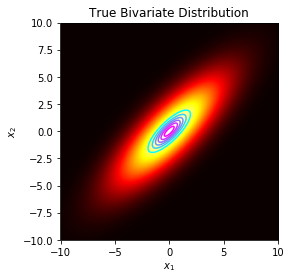

In [4]:
plt.imshow(z.squeeze().reshape([x.shape[0], -1]), extent=[-10, 10, -10, 10], cmap='hot', origin='lower')
plt.contour(x, x, z.squeeze().reshape([x.shape[0], -1]), cmap='cool')
plt.title('True Bivariate Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [5]:
x0 = [0, 0]
xt = x0
b = 0.8
samples = []
for i in range(100000):
    x1_t = np.random.normal(b*xt[1], 1-b*b)
    x2_t = np.random.normal(b*x1_t, 1-b*b)
    xt = [x1_t, x2_t]
    samples.append(xt)
burn_in = 1000
samples = np.array(samples[burn_in:])

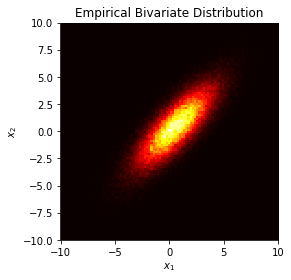

In [6]:
im, x_, y_ = np.histogram2d(samples[:, 0], samples[:, 1], bins=100, normed=True)
plt.imshow(im, extent=[-10, 10, -10, 10], cmap='hot', origin='lower', interpolation='nearest')
plt.title('Empirical Bivariate Distribution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()